In [2]:
!pip install networkx matplotlib
!pip install -q ndlib
!pip install -q bokeh

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend

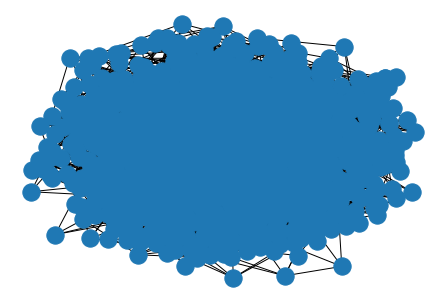

In [4]:
G = nx.watts_strogatz_graph(1000,8,1)
nx.draw(G)
plt.show()

In [5]:
print(nx.info(G))
print(nx.average_shortest_path_length(G))
print(nx.average_clustering(G))

Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 4000
Average degree:   8.0000
3.5657457457457458
0.006706154956154949


In [6]:
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def SIR_EQ(v, t, beta, gamma):
    return [-beta*v[0]*v[1], beta * v[0] * v[1] - gamma * v[1], gamma * v[1]]

In [8]:
#tの最大値とtの微小変化値
t_max = 120
dt = 0.01
#βγの値を決める
beta_const = 0.001
gamma_const = 0.45
#SIRの初期値
S_0=499
I_0=1
R_0=0
ini_state = [S_0,I_0,R_0] #[S[0], I[0], R[0]]
#格納
times =np.arange(0,t_max, dt)
args  =(beta_const, gamma_const)

In [9]:
model = ep.SIRModel(G)
config = mc.Configuration()
config.add_model_parameter('beta',0.1)
config.add_model_parameter('gamma',0.1)
config.add_model_parameter('percentage_infected',0.001)
model.set_initial_status(config)

iterations=model.iteration_bunch(75)
trends=model.build_trends(iterations)
output_notebook()

Loading BokehJS ...

In [10]:
viz = DiffusionTrend(model,trends)
p = viz.plot(width=400,height=400)
show(p)

In [20]:
n = 500
k = 4
p = 0.1
G = nx.watts_strogatz_graph(n,k,p)

#tの最大値とtの微小変化値
t_max = 120
dt = 0.01
#βγの値を決める
beta_const = 0.001
gamma_const = 0.45
#SIRの初期値
S_0=499
I_0=1
R_0=0
ini_state = [S_0,I_0,R_0] #[S[0], I[0], R[0]]
#格納
times =np.arange(0,t_max, dt)
args  =(beta_const, gamma_const)

model = ep.SIRModel(G)
config = mc.Configuration()
config.add_model_parameter('beta',0.1)
config.add_model_parameter('gamma',0.1)
config.add_model_parameter('percentage_infected',0.001)
model.set_initial_status(config)

iterations=model.iteration_bunch(75)
trends=model.build_trends(iterations)
output_notebook()
viz = DiffusionTrend(model,trends)
p = viz.plot(width=400,height=400)
show(p)

Loading BokehJS ...

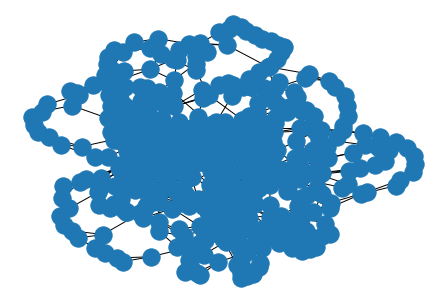

In [21]:
nx.draw(G)
plt.show()